## Get reccommeded products images list

### Import Libraries

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFile
# from keras.models import Model
# from keras.applications import vgg16
# from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from sklearn.metrics.pairwise import cosine_similarity
# %load_ext autotime

### Load recommeded result csv file as dataframe

In [14]:
recommened_df = pd.read_csv('./Predictions/RESULT_image_recommended_product_50k_for_100JH_ver3_top10_6.1.csv ')
recommened_df.head()

,user_id,given_product,given_product_img_url,recommended_product,recommended_product_img_url,similarity_score
0,19,B000ARPN28,https://images-na.ssl-images-amazon.com/images...,B003GDJ1PS,https://images-na.ssl-images-amazon.com/images...,0.833958
1,19,B000ARPN28,https://images-na.ssl-images-amazon.com/images...,B002B4A954,https://images-na.ssl-images-amazon.com/images...,0.815940
2,19,B000ARPN28,https://images-na.ssl-images-amazon.com/images...,B000BMT90E,https://images-na.ssl-images-amazon.com/images...,0.813858
3,19,B000ARPN28,https://images-na.ssl-images-amazon.com/images...,B007WTJCY2,https://images-na.ssl-images-amazon.com/images...,0.809082
4,19,B000ARPN28,https://images-na.ssl-images-amazon.com/images...,B000ARTQFI,https://images-na.ssl-images-amazon.com/images...,0.798094


In [15]:
given_products = list(np.unique(recommened_df['given_product'].to_list()))
len(given_products)

37

### Get Images with similarity score

-----------------------------------------------------------------------
original product: B0001MQ60A


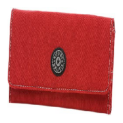

-----------------------------------------------------------------------
most similar products:
product ID: B00R78V6EM
similarity score :  0.7482036848040624


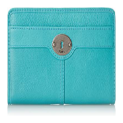

product ID: B000XS7NFO
similarity score :  0.7378827577352588


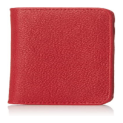

product ID: B0053MC3AA
similarity score :  0.7314290916778088


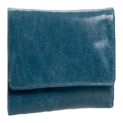

product ID: B001HZZ6BK
similarity score :  0.729959415485219


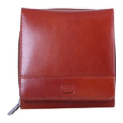

product ID: B00IE0CHXG
similarity score :  0.7056491215811955


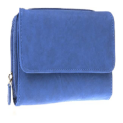

In [16]:
for asin in given_products[:1]:
    
    print("-----------------------------------------------------------------------")
    print("original product:",asin)

    dir_name = './Images_50K/'
    file_path = os.path.join(dir_name, asin + ".jpg" )
    original = load_img(file_path, target_size=(224, 224))
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(original)
    plt.show()
    
    print("-----------------------------------------------------------------------")
    print("most similar products:")
    
    # Recommended
    recommened_products = recommened_df[recommened_df['given_product']==asin]['recommended_product'].to_list()
    recommened_products_scores = recommened_df[recommened_df['given_product']==asin]['similarity_score'].to_list()
    
    for i in range(5):
        
        print("product ID:",recommened_products[i])
        print("similarity score : ",recommened_products_scores[i])
        
        dir_name = './Images_50K/'
        file_path = os.path.join(dir_name, recommened_products[i] + ".jpg" )
        original = load_img(file_path, target_size=(224, 224))
        plt.figure(figsize=(2,2))
        plt.axis('off')
        plt.imshow(original)
        plt.show()
         
    

### Get Image list 

/Users/yeongchoi/Anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


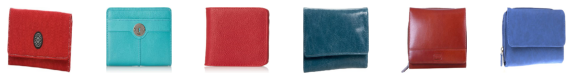

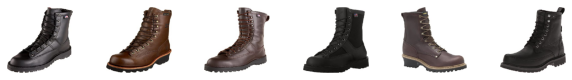

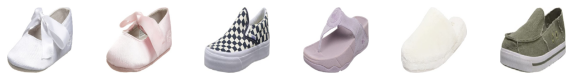

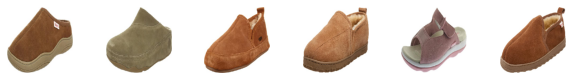

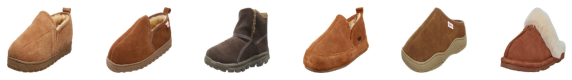

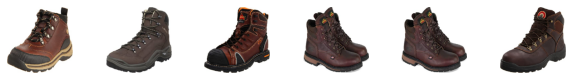

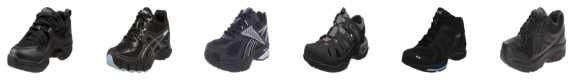

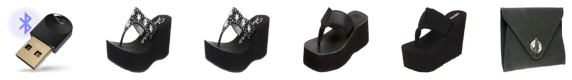

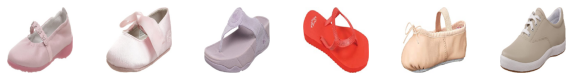

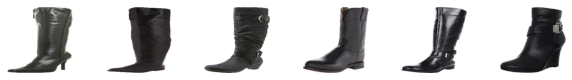

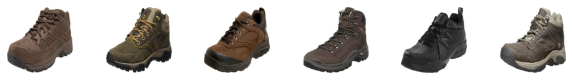

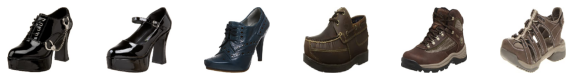

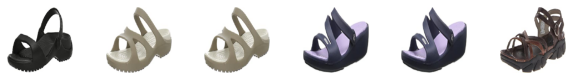

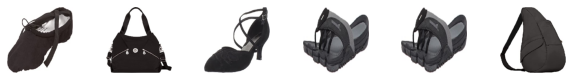

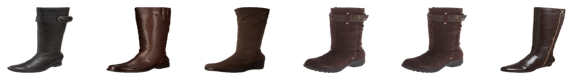

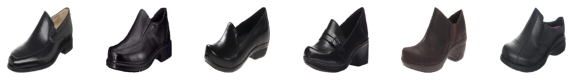

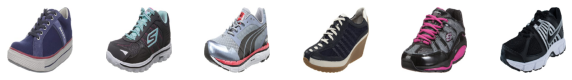

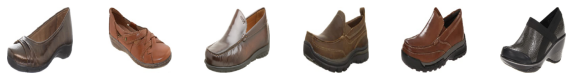

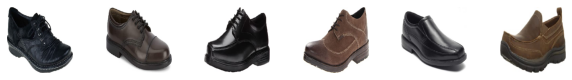

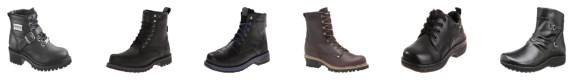

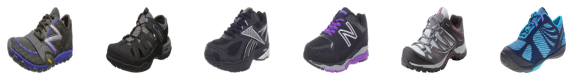

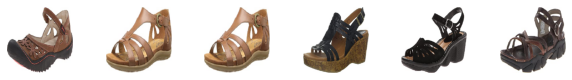

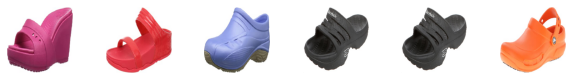

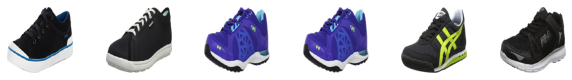

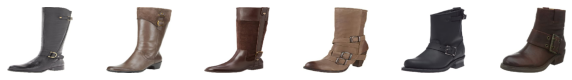

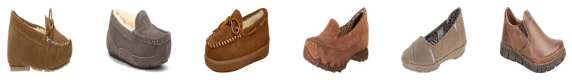

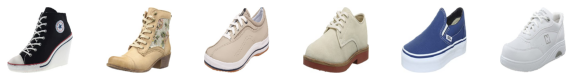

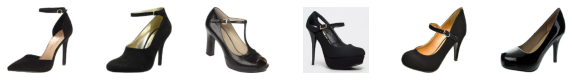

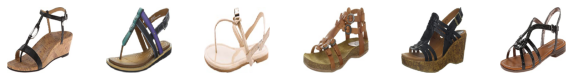

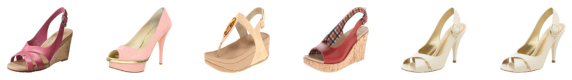

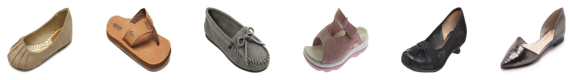

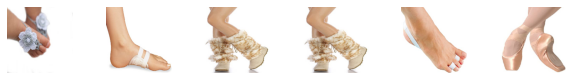

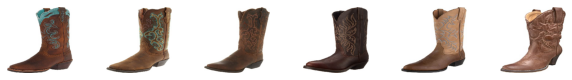

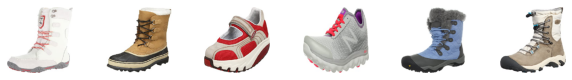

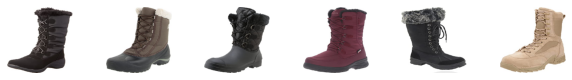

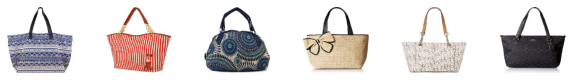

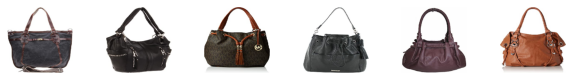

In [18]:
# sample = [given_products[i] for i in range(0,95,10)]

for asin in given_products:
    
    fig = plt.figure(figsize=(10,2))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    ax = fig.add_subplot(1, 6, 1)
#     ax.title.set_text('Original:')
    
    dir_name = './Images_50K/'
    file_path = os.path.join(dir_name, asin + ".jpg" )
    original = load_img(file_path, target_size=(224, 224))
    ax.axis('off')
    ax.imshow(original)
    
    # Recommended
    recommened_products = recommened_df[recommened_df['given_product']==asin]['recommended_product'].to_list()
    recommened_products_scores = recommened_df[recommened_df['given_product']==asin]['similarity_score'].to_list()
    
    
    for i in range(5):
        ax = fig.add_subplot(1, 6, i+2)
        if i == 0:
#             ax.title.set_text('Recommended:')
            dir_name = './Images_50K/'
            file_path = os.path.join(dir_name, recommened_products[i] + ".jpg" )
            original = load_img(file_path, target_size=(224, 224))
            ax.axis('off')
            ax.imshow(original)
        else:
            dir_name = './Images_50K/'
            file_path = os.path.join(dir_name, recommened_products[i] + ".jpg" )
            original = load_img(file_path, target_size=(224, 224))
            ax.axis('off')
            ax.imshow(original)
        
